<a href="https://colab.research.google.com/github/arya-sharma-codes/Medical_costs/blob/main/Medical_Costs_MLPart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
# import packages
import numpy as np #For scientific computing
import pandas as pd #For data manipulation 
import matplotlib.pyplot as plt #For data visualization 
import seaborn as sns #For more advamced data visualization 
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [6]:
# import the data
data = pd.read_csv('/content/gdrive/My Drive/Kaggle/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Feature Engineering**

In our analysis we observed skewness in the distribution of charges.Implementing log transform on this.

In [7]:
data["charges"] = np.log1p(data["charges"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


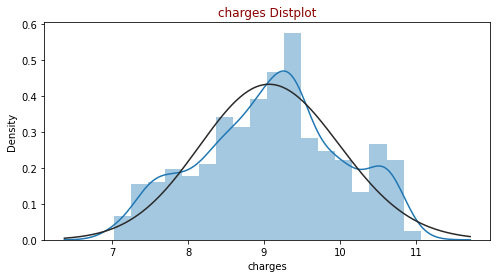

In [115]:
plt.figure(figsize=(8,4))
sns.distplot(data["charges"],fit=stats.gamma)
plt.title("charges Distplot", color = "darkred")
plt.show()

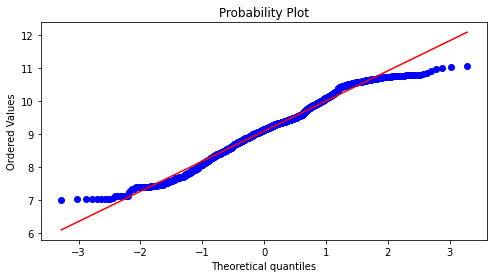

In [114]:
plt.figure(figsize=(8,4))
stats.probplot(data["charges"], plot = plt)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(data[col].values))
        data[col] = lbl.transform(data[col].values)       
display(data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455


In [11]:

X = data.drop(['charges'], axis=1)
Y = data.charges

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [15]:
! pip install catboost

     |████████████████████████████████| 69.2MB 44kB/s 


Importing the libraries necessay for making prediction.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#from catboost import catboostRegressor
from catboost import CatBoostRegressor

Creating a pipeline of the models

In [17]:
models = []
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor(n_neighbors=5)))
models.append(('DT',DecisionTreeRegressor(max_depth=3)))
models.append(('RF',RandomForestRegressor(n_estimators=100,max_depth=3)))
models.append(('ADB',AdaBoostRegressor(n_estimators=50,learning_rate=0.01)))
models.append(('GB',GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)))
models.append(('XGB',XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)))
models.append(('CBG',CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)))


Evaluating using cross validation

In [113]:
# evaluating each model using cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
  cv_results = cross_val_score(model,X_train,Y_train,cv=cv)
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.753069 (0.025357)
KNN: 0.779576 (0.036421)
DT: 0.782009 (0.031613)
RF: 0.810577 (0.027026)
ADB: 0.797316 (0.025508)
GB: 0.818413 (0.029281)
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

Box plot for visualizing performances of the models

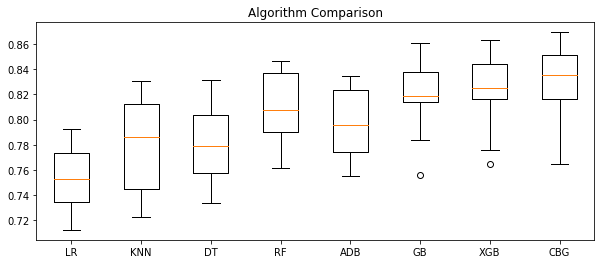

In [58]:
# Compare Algorithms
plt.figure(figsize=(10,4))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Linear Regression

In [116]:
LR=LinearRegression()
LR.fit(X_train, Y_train)
predictions=LR.predict(X_test)
LR_rmse=np.sqrt(mean_squared_error(Y_test,predictions))
LR_acc =round(r2_score(Y_test,predictions),2)*100
print("RMSE of LR:",LR_rmse)
print(f"Accuracy of Linear Regression {LR_acc} %")

RMSE of LR: 0.42130314917484224
Accuracy of Linear Regression 80.0 %


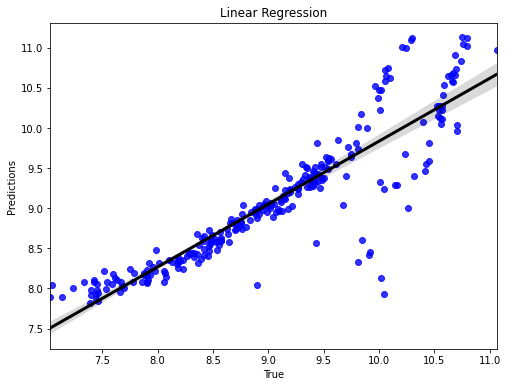

In [117]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, 
            scatter_kws=dict(color="blue"),
            line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.show()

KNN 

In [152]:
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train,Y_train)
predictions=KNN.predict(X_test)
#KNN.get_params()
KNN_rmse=np.sqrt(mean_squared_error(Y_test,predictions))
KNN_acc =round(r2_score(Y_test,predictions),2)*100
print("RMSE of KNN:",KNN_rmse)
print(f"Accuracy of KNN Regressor {KNN_acc} %")

RMSE of KNN: 0.4118803025783237
Accuracy of KNN Regressor 81.0 %


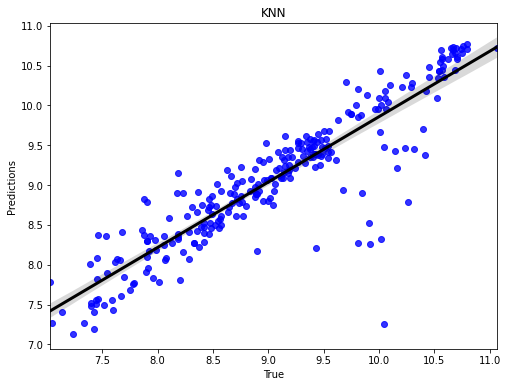

In [153]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, 
            scatter_kws=dict(color="blue"),
            line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("KNN")
plt.show()

Decision Tree Regressor

In [148]:


DT = DecisionTreeRegressor(random_state=10, max_depth=5)
DT.fit(X_train, Y_train)
predictions=DT.predict(X_test)
DT_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
DT_acc = round(r2_score(Y_test, predictions),1)*100
print("RMSE of DT Regressor:",DT_rmse)
print(f"Accuracy of DT Regressor {DT_acc} %")

RMSE of DT Regressor: 0.36970628702242103
Accuracy of DT Regressor 80.0 %


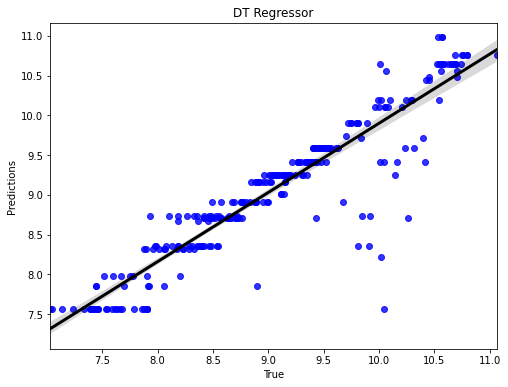

In [149]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, 
            scatter_kws=dict(color="blue"),
            line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("DT Regressor")
plt.show()

Random Forest Regressor

In [145]:
RF=RandomForestRegressor(n_estimators=100,max_depth=5)
RF.fit(X_train,Y_train)
predictions=RF.predict(X_test)
#RF.get_params()
RF_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
RF_acc = round(r2_score(Y_test, predictions),1)*100
print("RMSE of Random Forest Regressor:",RF_rmse)
print(f"Accuracy of Random Forest Regressor {RF_acc} %")

RMSE of Random Forest Regressor: 0.3529992640861097
Accuracy of Random Forest Regressor 90.0 %


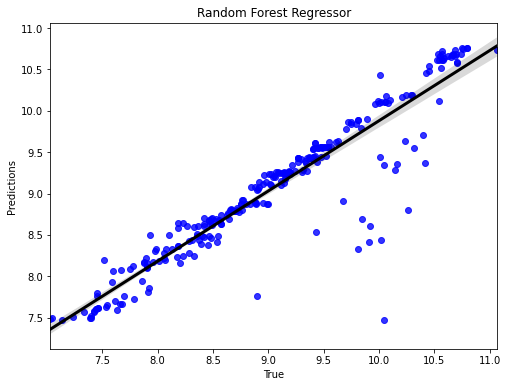

In [146]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, scatter_kws=dict(color="blue"),line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("Random Forest Regressor")
plt.show()

Ada Boost Regressor

In [143]:
ADB=AdaBoostRegressor(n_estimators=50,learning_rate=0.01)
ADB.fit(X_train,Y_train)
predictions=ADB.predict(X_test)
#ADB.get_params()
ADB_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
ADB_acc = round(r2_score(Y_test, predictions),1)*100
print("RMSE of Ada Boost Regressor:",RF_rmse)
print(f"Accuracy of Ada Boost Regressor {RF_acc} %")

RMSE of Ada Boost Regressor: 0.352434434683801
Accuracy of Ada Boost Regressor 86.0 %


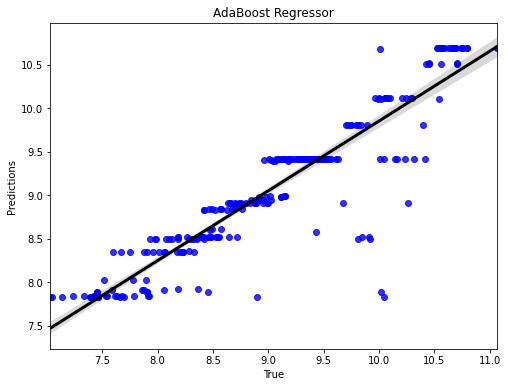

In [144]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, scatter_kws=dict(color="blue"),line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("AdaBoost Regressor")
plt.show()

Gradient Boosting Regressor

In [141]:
GB=GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2,random_state=9)

GB.fit(X_train,Y_train)
predictions=GB.predict(X_test)
#GB.get_params()
GB_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
GB_acc = round(r2_score(Y_test, predictions),1)*100
print("RMSE of GradientBoost Regressor:",GB_rmse)
print(f"Accuracy of GradientBoost Regressor {GB_acc} %")

RMSE of GradientBoost Regressor: 0.3512918775827593
Accuracy of GradientBoost Regressor 90.0 %


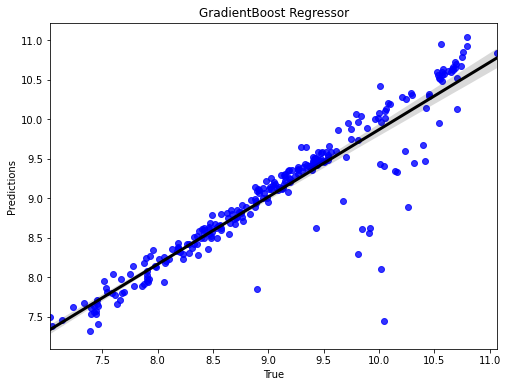

In [142]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, scatter_kws=dict(color="blue"),line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("GradientBoost Regressor")
plt.show()

XGB Regressor

In [139]:

XGB=XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
XGB.fit(X_train,Y_train)
predictions=XGB.predict(X_test)
#XGB.get_params()
XGB_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
XGB_acc = round(r2_score(Y_test, predictions),1)*100
print("RMSE of XGB Regressor:",XGB_rmse)
print(f"Accuracy of XGB Regressor {XGB_acc} %")

[16:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of XGB Regressor: 0.3479530560513246
Accuracy of XGB Regressor 90.0 %


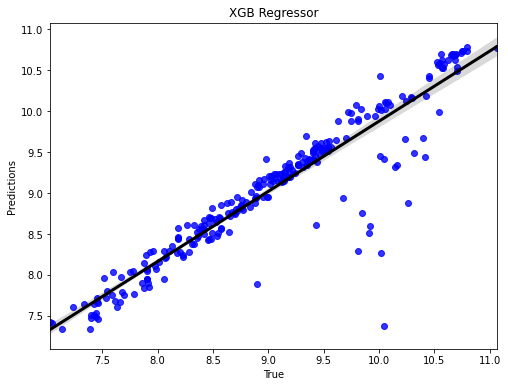

In [140]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, scatter_kws=dict(color="blue"),line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("XGB Regressor")
plt.show()

CatBoost Regressor

In [159]:

CBG=CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)
CBG.fit(X_train,Y_train)
predictions=CBG.predict(X_test)
CBG.get_params()
CBG_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
CBG_acc = round(r2_score(Y_test, predictions),1)*100
print("RMSE of GradientBoost Regressor:",CBG_rmse)
print(f"Accuracy of GradientBoost Regressor {CBG_acc} %")

RMSE of GradientBoost Regressor: 0.34397421053648036
Accuracy of GradientBoost Regressor 90.0 %


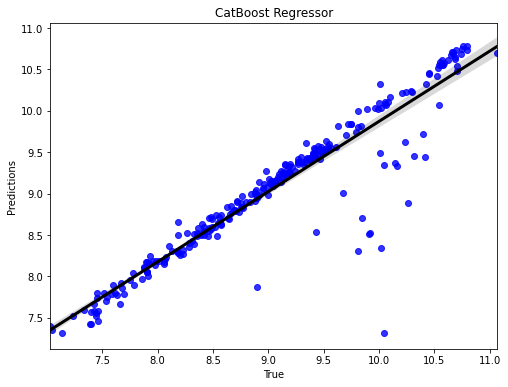

In [138]:
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test, y=predictions, scatter_kws=dict(color="blue"),line_kws=dict(color="black", linewidth=3))
plt.xlabel("True")
plt.ylabel("Predictions")
plt.title("CatBoost Regressor")
plt.show()

Visualizing the RMSE scores of the models

In [154]:
rmse_scores = {"Linear Regression": [LR_rmse],
                  "K Nearest Neighbours":[KNN_rmse],
                  "Decision Tree Regressor": [DT_rmse],
                  "Random Forest": [RF_rmse],
                  "Ada Boost Regressor" : [ADB_rmse],
                  "Gradient Boosting Regressor":[GB_rmse],
                  "XGBRegressor":[XGB_rmse],
                  "CatBoost":[CBG_rmse]
              }
rmse_scores = pd.DataFrame(rmse_scores)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


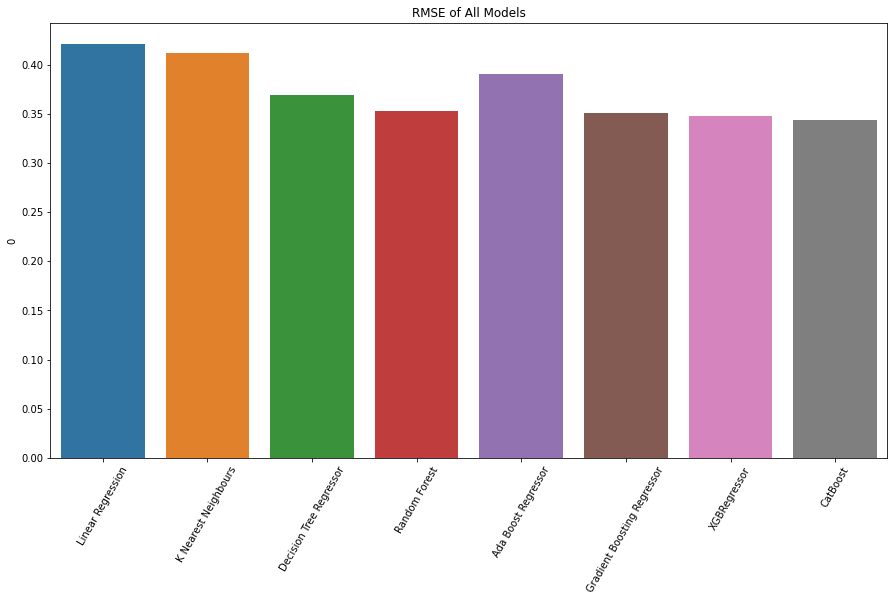

In [155]:
plt.figure(figsize=(15,8))
sns.barplot(rmse_scores.columns, rmse_scores.iloc[0])
plt.xticks(rotation=60)
plt.title("RMSE of All Models")
plt.show()

Visualizing the accuracies of the models

In [156]:
acc = {"Linear Regression": [LR_acc],
                  "K Nearest Neighbours":[KNN_acc],
                  "Decision Tree Regressor": [DT_acc],
                  "Random Forest": [RF_acc],
                  "Ada Boost Regressor" : [ADB_acc],
                  "Gradient Boosting Regressor":[GB_acc],
                  "XGBRegressor":[XGB_acc],
                  "CatBoost":[CBG_acc]
              }
acc = pd.DataFrame(acc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


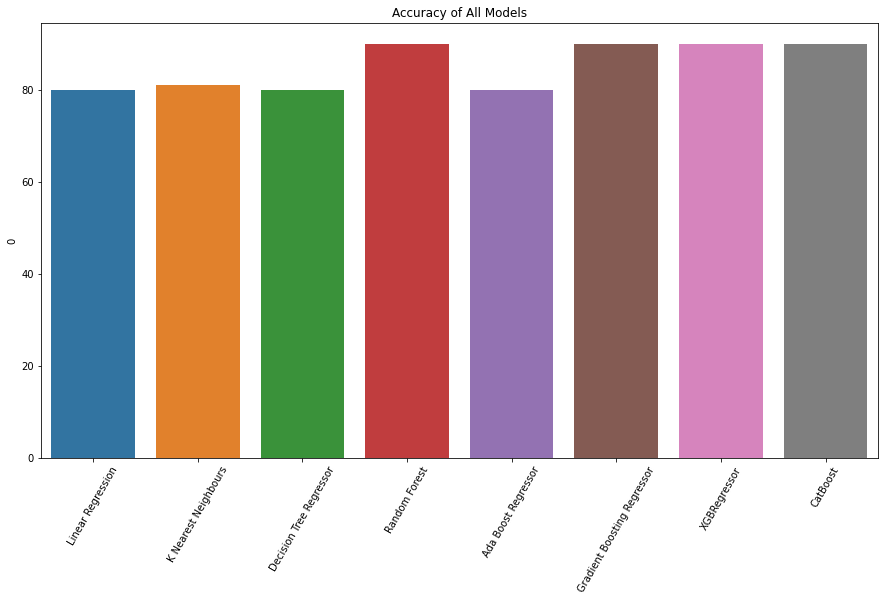

In [157]:
plt.figure(figsize=(15,8))
sns.barplot(acc.columns, acc.iloc[0])
plt.xticks(rotation=60)
plt.title("Accuracy of All Models")
plt.show()

Conclusion:
Random Forest,Gradient Boosting regressor,XGBRegressor and CatBoost models have an accuracy of 90%.